In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import auc, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error, r2_score, classification_report, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

In [29]:
# Load the dataset
glass_df = pd.read_csv('./datasets/glass.csv')
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [30]:
glass_df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [31]:
# Splitting features and target variable
X = glass_df.drop('Type', axis=1)
y = glass_df['Type']

In [32]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [34]:
# Initialize classifiers
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=1000, random_state=42)
naive_bayes = GaussianNB()

In [35]:
# Train classifiers
knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [36]:
# Evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


K-Nearest Neighbors Evaluation:
Accuracy: 0.65
Precision: 0.62
Recall: 0.65
F1 Score: 0.62
Mean Squared Error (MSE): 1.54
Mean Absolute Error (MAE): 0.62
R2 Score: 0.68
Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.84      0.68        19
           2       0.59      0.57      0.58        23
           3       0.00      0.00      0.00         4
           5       0.67      0.33      0.44         6
           6       1.00      0.67      0.80         3
           7       0.90      0.90      0.90        10

    accuracy                           0.65        65
   macro avg       0.62      0.55      0.57        65
weighted avg       0.62      0.65      0.62        65

Confusion Matrix:
[[16  3  0  0  0  0]
 [ 9 13  0  1  0  0]
 [ 2  2  0  0  0  0]
 [ 1  3  0  2  0  0]
 [ 0  0  0  0  2  1]
 [ 0  1  0  0  0  9]]


C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\miniconda3\Lib\site-pa

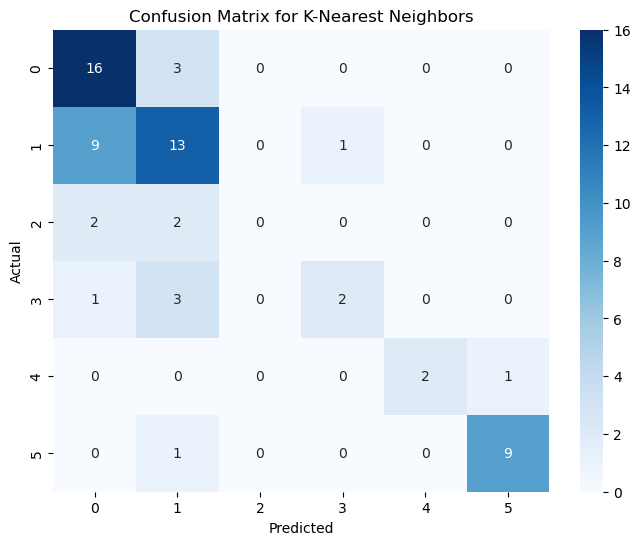


Logistic Regression Evaluation:
Accuracy: 0.68
Precision: 0.67
Recall: 0.68
F1 Score: 0.65
Mean Squared Error (MSE): 1.18
Mean Absolute Error (MAE): 0.54
R2 Score: 0.75
Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.74      0.68        19
           2       0.62      0.70      0.65        23
           3       0.00      0.00      0.00         4
           5       1.00      0.33      0.50         6
           6       0.67      0.67      0.67         3
           7       0.91      1.00      0.95        10

    accuracy                           0.68        65
   macro avg       0.64      0.57      0.58        65
weighted avg       0.67      0.68      0.65        65

Confusion Matrix:
[[14  4  1  0  0  0]
 [ 6 16  0  0  1  0]
 [ 2  2  0  0  0  0]
 [ 0  4  0  2  0  0]
 [ 0  0  0  0  2  1]
 [ 0  0  0  0  0 10]]


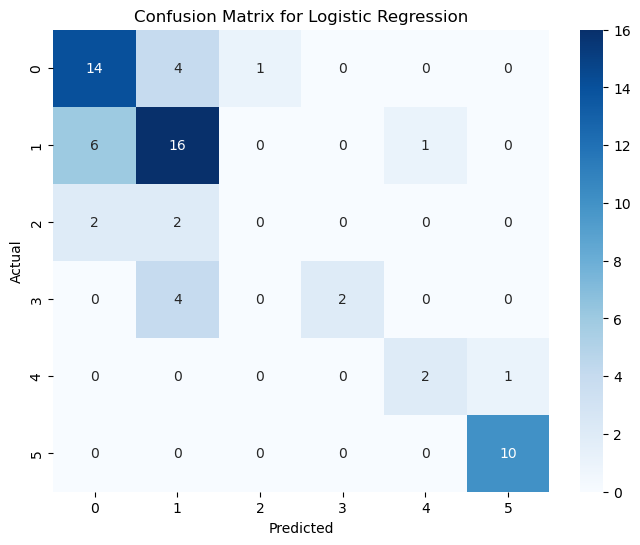


Naive Bayes Evaluation:
Accuracy: 0.31
Precision: 0.35
Recall: 0.31
F1 Score: 0.29
Mean Squared Error (MSE): 2.95
Mean Absolute Error (MAE): 1.29
R2 Score: 0.38
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        19
           2       0.40      0.17      0.24        23
           3       0.08      0.75      0.15         4
           5       0.33      0.17      0.22         6
           6       0.75      1.00      0.86         3
           7       0.90      0.90      0.90        10

    accuracy                           0.31        65
   macro avg       0.41      0.50      0.40        65
weighted avg       0.35      0.31      0.29        65

Confusion Matrix:
[[ 0  1 18  0  0  0]
 [ 1  4 15  1  1  1]
 [ 1  0  3  0  0  0]
 [ 0  5  0  1  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  1  0  9]]


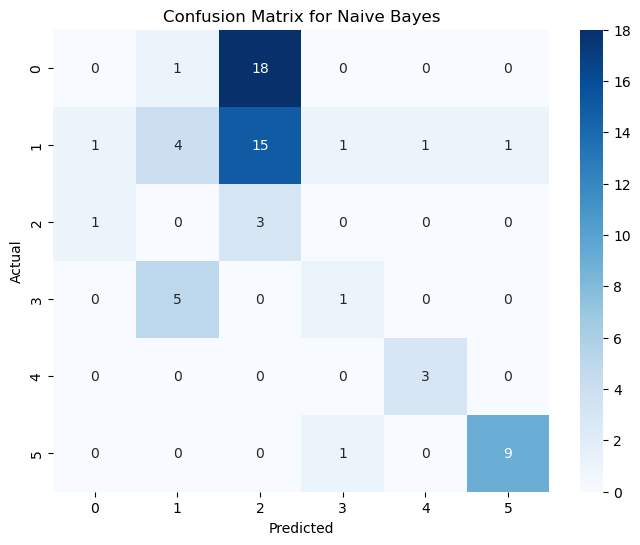

In [37]:
evaluate_model(knn, X_test, y_test, "K-Nearest Neighbors")
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")
evaluate_model(naive_bayes, X_test, y_test, "Naive Bayes")

In [38]:
# Ensemble classifier using Stacking
estimators = [
    ('knn', knn),
    ('log_reg', log_reg),
    ('naive_bayes', naive_bayes)
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=3)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('knn', KNeighborsClassifier()),
                               ('log_reg',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42)),
                               ('naive_bayes', GaussianNB())],
                   final_estimator=LogisticRegression())


Stacking Ensemble Evaluation:
Accuracy: 0.66
Precision: 0.58
Recall: 0.66
F1 Score: 0.61
Mean Squared Error (MSE): 1.77
Mean Absolute Error (MAE): 0.66
R2 Score: 0.63
Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.68      0.68        19
           2       0.55      0.78      0.64        23
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           6       0.75      1.00      0.86         3
           7       1.00      0.90      0.95        10

    accuracy                           0.66        65
   macro avg       0.50      0.56      0.52        65
weighted avg       0.58      0.66      0.61        65

Confusion Matrix:
[[13  6  0  0  0  0]
 [ 4 18  0  0  1  0]
 [ 2  2  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0  0  0  3  0]
 [ 0  1  0  0  0  9]]


C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\miniconda3\Lib\site-pa

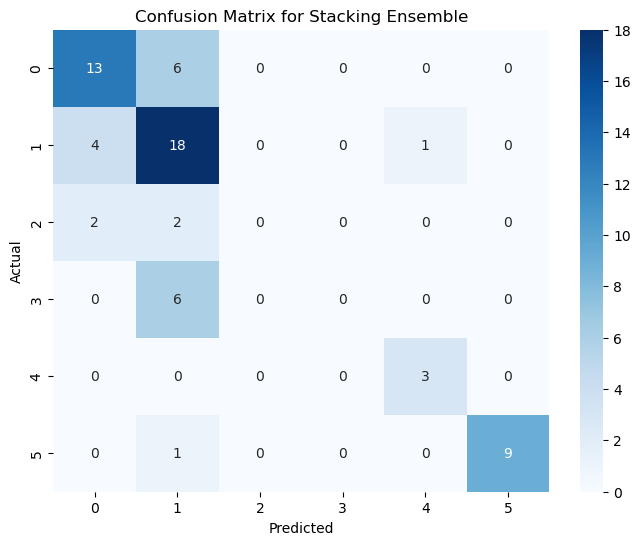

In [39]:
# Evaluate the stacking ensemble
evaluate_model(stacking_clf, X_test, y_test, "Stacking Ensemble")

In [40]:
# Hyperparameter tuning for ensemble method
param_grid = {
    'final_estimator__C': [0.1, 1, 10],
    'final_estimator__solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(stacking_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=StackingClassifier(cv=3,
                                          estimators=[('knn',
                                                       KNeighborsClassifier()),
                                                      ('log_reg',
                                                       LogisticRegression(max_iter=1000,
                                                                          random_state=42)),
                                                      ('naive_bayes',
                                                       GaussianNB())],
                                          final_estimator=LogisticRegression()),
             param_grid={'final_estimator__C': [0.1, 1, 10],
                         'final_estimator__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [41]:
print("\nBest parameters for Stacking Ensemble:", grid_search.best_params_)
print(f"Best accuracy from Grid Search: {grid_search.best_score_:.2f}")


Best parameters for Stacking Ensemble: {'final_estimator__C': 1, 'final_estimator__solver': 'lbfgs'}
Best accuracy from Grid Search: 0.66


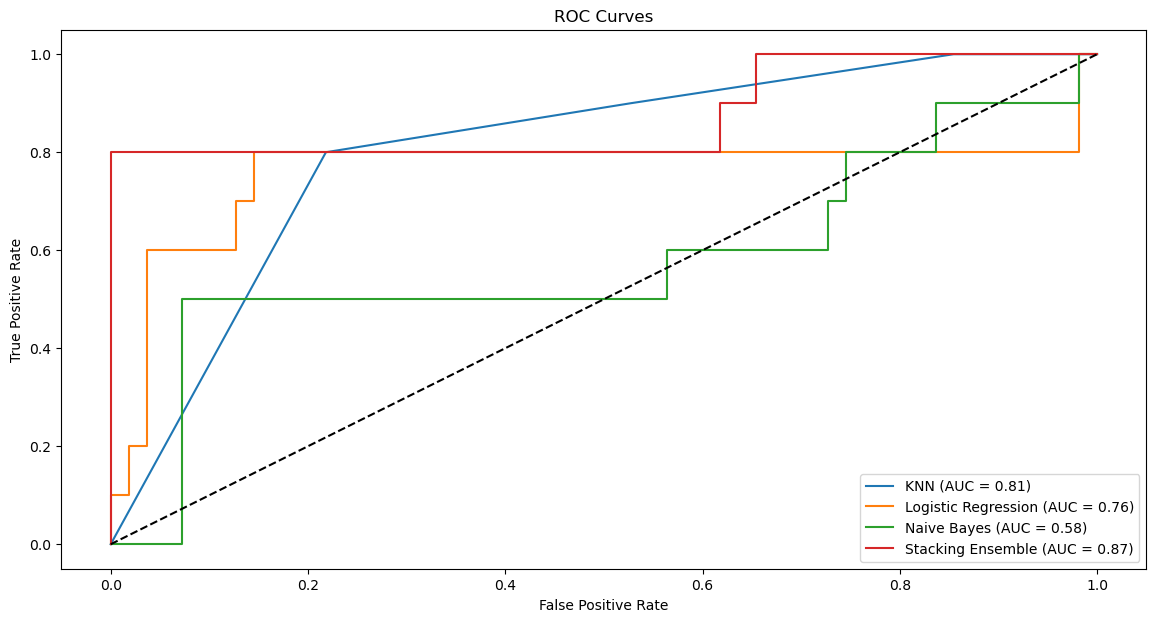

In [42]:
# Plotting ROC curve for each model
plt.figure(figsize=(14, 7))

for clf, name in zip([knn, log_reg, naive_bayes, stacking_clf], ['KNN', 'Logistic Regression', 'Naive Bayes', 'Stacking Ensemble']):
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1] if y_test.nunique() == 2 else clf.predict_proba(X_test).max(axis=1)
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=y_test.max())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

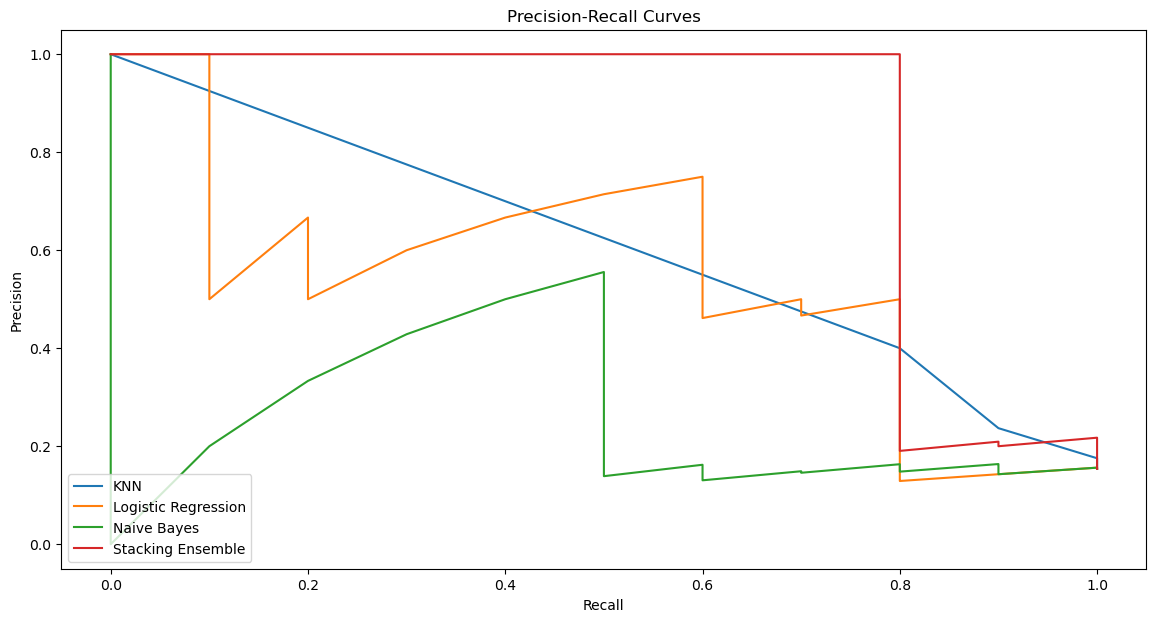

In [43]:
# Precision-Recall Curves
plt.figure(figsize=(14, 7))

for clf, name in zip([knn, log_reg, naive_bayes, stacking_clf], ['KNN', 'Logistic Regression', 'Naive Bayes', 'Stacking Ensemble']):
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1] if y_test.nunique() == 2 else clf.predict_proba(X_test).max(axis=1)
        precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=y_test.max())
        plt.plot(recall, precision, label=f'{name}')

plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


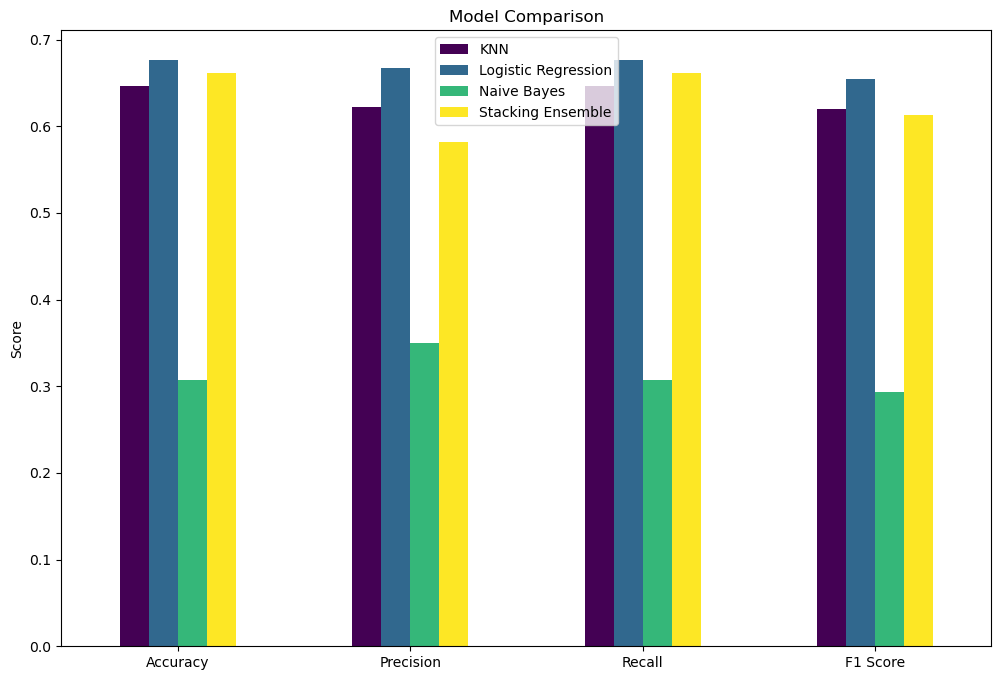

In [44]:
# Bar chart for model comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
results = {
    'KNN': [accuracy_score(y_test, knn.predict(X_test)),
            precision_score(y_test, knn.predict(X_test), average='weighted'),
            recall_score(y_test, knn.predict(X_test), average='weighted'),
            f1_score(y_test, knn.predict(X_test), average='weighted')],
    'Logistic Regression': [accuracy_score(y_test, log_reg.predict(X_test)),
                            precision_score(y_test, log_reg.predict(X_test), average='weighted'),
                            recall_score(y_test, log_reg.predict(X_test), average='weighted'),
                            f1_score(y_test, log_reg.predict(X_test), average='weighted')],
    'Naive Bayes': [accuracy_score(y_test, naive_bayes.predict(X_test)),
                    precision_score(y_test, naive_bayes.predict(X_test), average='weighted'),
                    recall_score(y_test, naive_bayes.predict(X_test), average='weighted'),
                    f1_score(y_test, naive_bayes.predict(X_test), average='weighted')],
    'Stacking Ensemble': [accuracy_score(y_test, stacking_clf.predict(X_test)),
                          precision_score(y_test, stacking_clf.predict(X_test), average='weighted'),
                          recall_score(y_test, stacking_clf.predict(X_test), average='weighted'),
                          f1_score(y_test, stacking_clf.predict(X_test), average='weighted')]
}

df_results = pd.DataFrame(results, index=metrics)
df_results.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()